In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2



In [96]:
face = DeepFace.extract_faces("/Users/choejm/image/jaemin0.jpg", target_size=(224,224), detector_backend="opencv")
len(face)

1

In [99]:
face

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

In [61]:
IMG=face[0]["face"]

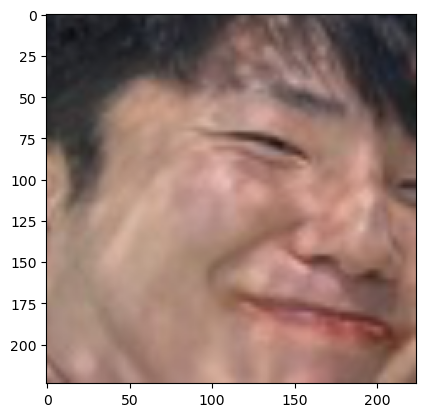

In [62]:
plt.imshow(IMG)

In [89]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
result = DeepFace.verify(img1_path = img1, 
                         img2_path = img2,
                        model_name = models[2])

In [90]:
result

{'verified': False,
 'distance': 0.5880880528801209,
 'threshold': 0.3,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 1269, 'y': 1016, 'w': 847, 'h': 847},
  'img2': {'x': 188, 'y': 263, 'w': 65, 'h': 65}},
 'time': 0.58}

In [88]:
img1=cv2.imread("/Users/choejm/image/jaemin0.jpg")
img2=cv2.imread("/Users/choejm/image/jonhun.jpg")

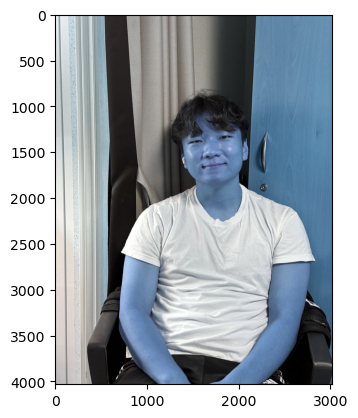

In [80]:
plt.imshow(img1)

In [82]:
face = DeepFace.extract_faces(img1, target_size=(224,224), detector_backend="opencv")
len(face)

1

In [83]:
IMG=face[0]["face"]

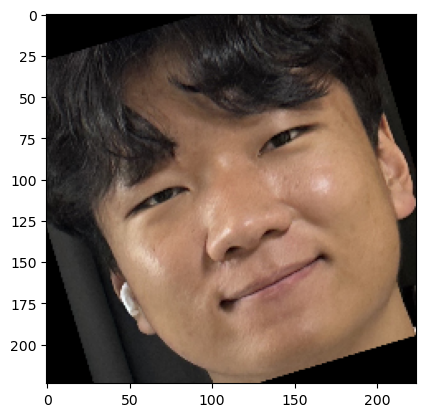

In [84]:
plt.imshow(IMG)

In [85]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
dfs = DeepFace.find(img_path = img1, db_path = "/Users/choejm/image", model_name=models[2])

There are  7  representations found in  representations_facenet512.pkl
find function lasts  0.5212678909301758  seconds


In [87]:
dfs

[                          identity  source_x  source_y  source_w  source_h  \
 0  /Users/choejm/image/jaemin0.jpg      1269      1016       847       847   
 
    Facenet512_cosine  
 0       2.220446e-16  ]

In [16]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

class faceDetect:
    def __init__(self):
        self.models = ["VGG-Face",
                       "Facenet",
                       "Facenet512",
                       "OpenFace",
                       "DeepFace",
                       "DeepID",
                       "ArcFace",
                       "Dlib",
                       "SFace", ]

        self.database = "/Users/choejm/image"

        self.current_img = None  # 현재 얼굴 사진 데이터(or 경로)

        self.id_img = None  # 민증 사진 데이터(or 경로)
        self.id_name = None  # 이름


    def match_face(self, img1=None, img2=None, name=None):
        # precondition : img1에는 현재 사진데이터(or 경로), img2에는 민증사진데이터(or 경로), name에는 이름을 할당
        #                민증 사진을 주기 전에 생년월일로 성인인지 판별 후 성인일때만 함수 이용해야 한다.
        # postcondition: 민증 사진 없이 현재 사진만 입력하면 데이터베이스에 있는 사진들과 비교,
        #                두개 사진 모두 입력하면 2개의 사진 비교 일치하면 true 반환
        try:
            if isinstance(img1, str):
                img1 = cv2.imread(img1)

            if isinstance(img2, str):
                img2 = cv2.imread(img2)


            if img2 == None:

                dfs = DeepFace.find(img_path=img1,
                                    db_path=self.database, model_name=self.models[2])
                return dfs
                if len(dfs) > 0:
                    return True

                return False

            result = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=self.models[2])

            if result["verified"]:
                cv2.imwrite(self.database + name + "_pic" + ".jpg", img1)
                cv2.imwrite(self.database + name + "_ifm" + ".jpg", img2)
                return True

            return False

        except ValueError as v:
            # 얼굴 인식이 되지 않을때 예외 처리
            print(v)
            return False

    def show_face(self, img):
        # 이미지의 있는 얼굴들 출력
        try:
            faces = DeepFace.extract_faces(img, target_size=(224, 224), detector_backend="opencv")
            fig, axs = plt.subplots(int(len(faces) / 2 + 1), 2, figsize=(15, 10))
            axs = axs.flatten()

            for i, face in enumerate(faces):
                IMG = face["face"]
                axs[i].imshow(IMG)

            plt.show()

        except ValueError as v:
            print(v)

    def current_face(self):
        # 주환이형이 여기서 얼굴인식하고 인식했으면 그 값을 리턴해주세요
        pass


if __name__ == '__main__':
    fd = faceDetect()
    # fd.face_show("/Users/choejm/image/jaemin0.jpg")
    dfs=fd.match_face(img1 = "image/juwan2.jpg")


    # 이런식으로 사용 될 예정
    # now_img = fd.current_face()
    # fd.match_face(img1 = now_img, img2 = 민증사진, name = 이름)
    # 리턴 값이 true 아니면 falsed이다.





There are  7  representations found in  representations_facenet512.pkl
find function lasts  0.09447002410888672  seconds


In [22]:
print(dfs)

[                         identity  source_x  source_y  source_w  source_h  \
0  /Users/choejm/image/MESSI2.jpg        76        98       168       168   

   Facenet512_cosine  
0           0.251467  ]


In [102]:
print(fd.match_face("image/일론머스크.jpg", "image/일론머스크2.jpg"))

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
False


In [103]:
"Hello"+" World"

'Hello World'

In [107]:
print(fd.match_face("image/일론머스크.jpg", "image/jaemin0.jpg", name="일론머스크"))

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
False


In [105]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
result = DeepFace.verify(img1_path = "image/일론머스크.jpg", 
                         img2_path = "image/jaemin0.jpg",
                        model_name = models[2])

ValueError: Confirm that image/jaemin0.jpg exists